In [1]:
import matplotlib.pyplot as plt
import pandas as p
import seaborn as sns
import numpy as np
%matplotlib inline
from scipy.stats import linregress
from scipy.spatial import distance
from matplotlib import colors
import scipy
import os
from matplotlib.backends.backend_pdf import PdfPages
# from sklearn.decomposition import PCA
from ast import literal_eval
# sns.set()
# sns.set_context('talk')
# sns.set(font="Avenir")
sns.set_color_codes()
sns.set_style('white')
sns.set_style('ticks')
# sns.set_style({'font.family': 'Avenir'})

In [2]:
# reads = {'P104':{'P101':11297483,'P108':176974,'P109':116886,'P110':116021,'P126':122343,'P127':175026,'P128':118568,'P129':130425},
#         'P105':{'P101':145548,'P108':5320816,'P109':141180,'P110':214279,'P126':255777,'P127':179705,'P128':105968,'P129':144688},
#          'P111':{'P101':103766,'P108':142713,'P109':5819360,'P110':118691,'P126':146612,'P127':146799,'P128':452573,'P129':106691},
#          'P112':{'P101':105337,'P108':132294,'P109':105871,'P110':7713064,'P126':114089,'P127':774597,'P128':94566,'P129':98694},
#          'P122':{'P101':117642,'P108':151993,'P109':106913,'P110':124232,'P126':9255013,'P127':260973,'P128':115021,'P129':128170},
#          'P123':{'P101':193064,'P108':260704,'P109':166518,'P110':195574,'P126':221858,'P127':17255590,'P128':230048,'P129':204500},
#          'P124':{'P101':112986,'P108':151547,'P109':94961,'P110':105352,'P126':113328,'P127':180414,'P128':10433370,'P129':142270},
#          'P125':{'P101':160023,'P108':161776,'P109':108978,'P110':156227,'P126':152434,'P127':249939,'P128':156332,'P129':10122216},
# #          'P130':{'P101':25812,'P108':2268,'P109':2048,'P110':2278,'P126':1941,'P127':6076,'P128':3762,'P129':62100},
#          'P131':{'P101':25812,'P108':2268,'P109':2048,'P110':2278,'P126':1941,'P127':6076,'P128':3762,'P129':62100},
# #          'P132':{'P101':376,'P108':872,'P109':1701,'P110':1111,'P126':6660,'P127':775,'P128':394,'P129':625},
#          'P133':{'P101':25812,'P108':2268,'P109':2048,'P110':2278,'P126':1941,'P127':6076,'P128':3762,'P129':62100}
#         }


## 1 Big Batch First Sequencing Run
bb1_reads = {'P104':{'P101':11297492,'P108':176963,'P109':116876,'P110':116018,'P126':122327,'P127':175013,'P128':118551,'P129':130432},
        'P105':{'P101':145545,'P108':5320795,'P109':141177,'P110':214283,'P126':255780,'P127':179705,'P128':105979,'P129':144691},
         'P111':{'P101':109208,'P108':141098,'P109':5816661,'P110':116945,'P126':148799,'P127':135999,'P128':443637,'P129':118731},
         'P112':{'P101':105323,'P108':132283,'P109':105855,'P110':7713012,'P126':114104,'P127':774587,'P128':94573,'P129':98678},
         'P122':{'P101':117641,'P108':151996,'P109':106906,'P110':124232,'P126':9254987,'P127':260973,'P128':115010,'P129':128148},
         'P123':{'P101':201765,'P108':262797,'P109':167368,'P110':209900,'P126':225316,'P127':17262036,'P128':233913,'P129':226306},
         'P124':{'P101':112990,'P108':151548,'P109':94957,'P110':105360,'P126':113327,'P127':180419,'P128':10433379,'P129':142270},
         'P125':{'P101':116350,'P108':146027,'P109':105229,'P110':110651,'P126':125646,'P127':236529,'P128':141302,'P129':10047498},
         'P130':{'P101':25801,'P108':2259,'P109':2041,'P110':2261,'P126':1901,'P127':6065,'P128':3738,'P129':62057},
         'P131':{'P101':28387,'P108':12783,'P109':2945,'P110':17919,'P126':20165,'P127':6653,'P128':19216,'P129':16112},
         'P132':{'P101':375,'P108':874,'P109':1706,'P110':1106,'P126':6658,'P127':766,'P128':387,'P129':627},
         'P133':{'P101':544,'P108':2193,'P109':2402,'P110':14736,'P126':619,'P127':11601,'P128':844,'P129':2214}
        }

real_pair = {'P104':{'P101':True,'P108':False,'P109':False,'P110':False,'P126':False,'P127':False,'P128':False,'P129':False},
        'P105':{'P101':False,'P108':True,'P109':False,'P110':True,'P126':True,'P127':True,'P128':True,'P129':True},
         'P111':{'P101':False,'P108':True,'P109':True,'P110':False,'P126':True,'P127':True,'P128':True,'P129':True},
         'P112':{'P101':False,'P108':True,'P109':True,'P110':True,'P126':False,'P127':True,'P128':True,'P129':True},
         'P122':{'P101':False,'P108':True,'P109':True,'P110':True,'P126':True,'P127':False,'P128':True,'P129':True},
         'P123':{'P101':False,'P108':True,'P109':True,'P110':True,'P126':True,'P127':True,'P128':False,'P129':True},
         'P124':{'P101':False,'P108':True,'P109':True,'P110':True,'P126':True,'P127':True,'P128':True,'P129':True},
         'P125':{'P101':False,'P108':True,'P109':True,'P110':True,'P126':True,'P127':True,'P128':True,'P129':True},
         'P130':{'P101':False,'P108':True,'P109':True,'P110':True,'P126':True,'P127':True,'P128':True,'P129':True},
         'P131':{'P101':False,'P108':False,'P109':False,'P110':False,'P126':False,'P127':True,'P128':True,'P129':False},
         'P132':{'P101':False,'P108':False,'P109':False,'P110':True,'P126':True,'P127':False,'P128':False,'P129':False},
         'P133':{'P101':False,'P108':True,'P109':True,'P110':False,'P126':False,'P127':False,'P128':False,'P129':False}
        }

## 1 Big Batch Second Run (05 11 2018)

# reads_df = p.read_table('BB_051118_allindices.tab',sep='    ')

reads_df = p.read_table('BB_080618_condensedBarcodeCounts.tab',sep='    ')
# spiked = {'FwdPrimer':'P123','RevPrimer':'P127','Reads':14112513}
# reads_df = reads_df.append(spiked,ignore_index=True)
reads = {}
for fwd in np.unique(reads_df['FwdPrimer'].values):
    reads[fwd] = {}
    for rev in np.unique(reads_df['RevPrimer'].values):
        print(fwd,rev)
        this_pair = reads_df[(reads_df['FwdPrimer'].isin([fwd]) & (reads_df['RevPrimer'].isin([rev])))]
        if len(this_pair) > 0:
            reads[fwd][rev] = this_pair['Reads'].values[0]
        else:
            reads[fwd][rev] = 0
            


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:49: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.


KeyError: 'FwdPrimer'

In [ ]:
np.mean()

In [39]:
for f in np.unique(reads_df['FwdPrimer'].values):
    print(f,np.sort(reads_df[reads_df['FwdPrimer']==f]['RevPrimer'].values))

P104 ['P101' 'P108' 'P109' 'P110' 'P126' 'P127' 'P128' 'P129']
P105 ['P101' 'P108' 'P109' 'P110' 'P126' 'P127' 'P128' 'P129']
P111 ['P101' 'P108' 'P109' 'P110' 'P126' 'P127' 'P128' 'P129']
P112 ['P101' 'P108' 'P109' 'P110' 'P126' 'P127' 'P128' 'P129']
P122 ['P101' 'P108' 'P109' 'P110' 'P126' 'P127' 'P128' 'P129']
P123 ['P101' 'P108' 'P109' 'P110' 'P126' 'P127' 'P128' 'P129']
P124 ['P101' 'P108' 'P109' 'P110' 'P126' 'P127' 'P128' 'P129']
P125 ['P101' 'P108' 'P109' 'P110' 'P126' 'P127' 'P128' 'P129']
P130 ['P101' 'P108' 'P109' 'P110' 'P126' 'P127' 'P128' 'P129']
P131 ['P101' 'P108' 'P109' 'P110' 'P126' 'P127' 'P128' 'P129']
P132 ['P101' 'P108' 'P109' 'P110' 'P126' 'P127' 'P128' 'P129']
P133 ['P101' 'P108' 'P109' 'P110' 'P126' 'P127' 'P128' 'P129']


In [4]:
master_list = []

for k,l in reads.items():
    
    master_list.append([i for k,i in l.items()])
    
pair_list = []  

for k,l in real_pair.items():
    
    pair_list.append([i for k,i in l.items()])

In [19]:
this = np.asarray(master_list).ravel()[[i for i in range(len(np.asarray(pair_list).ravel())) if np.asarray(pair_list).ravel()[i]]]

In [21]:
print(np.min(this),np.mean(this),np.max(this))
print(np.min(this)/500,np.mean(this)/500,np.max(this)/500)

244064 2602790.172413793 14112513
488.128 5205.580344827586 28225.026


In [41]:
correct_list = np.zeros(np.asarray(master_list).shape)

for i in range(len(correct_list)):
    for j in range(len(correct_list[i])):
        if i == j:
            correct_list[i][j] = 0.0
        else:
            correct_list[i][j] = 1.0
        

In [42]:
np.sum([master_list[i][i] for i in range(8)])/np.sum(master_list)
    

0.4106965453095005

In [68]:
np.count_nonzero(master_list)

58

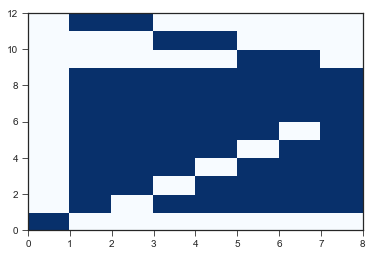

In [51]:
fig, ax1 = plt.subplots()
pcm = plt.pcolormesh(pair_list,cmap='Blues')
# pcm = plt.pcolormesh(real_pair,cmap='Blues',norm=colors.LogNorm(np.min(master_list),np.max(master_list)))
# cbar = fig.colorbar(pcm,pad=0.16)
# cbar.set_label('Number of Reads')

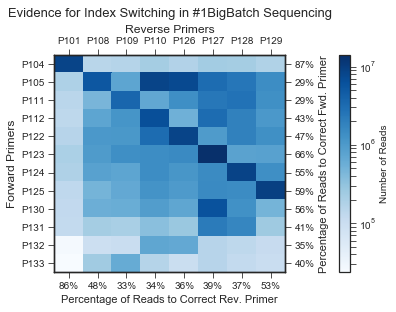

In [43]:
fig, ax1 = plt.subplots()
# pcm = plt.pcolormesh(master_list,cmap='Blues')
pcm = plt.pcolormesh(master_list,cmap='Blues',norm=colors.LogNorm(np.min(master_list),np.max(master_list)))
cbar = fig.colorbar(pcm,pad=0.16)
cbar.set_label('Number of Reads')

plt.title('Evidence for Index Switching in #1BigBatch Sequencing',y=1.15,fontsize=13)

# plt.plot(np.asarray(range(len(master_list[0])))+0.5,np.asarray(range(len(master_list[0])))+0.5,'ro',linestyle='')
plt.gca().invert_yaxis()
ax1.xaxis.tick_top()

plt.xlabel('Percentage of Reads to Correct Rev. Primer',fontsize=11)
plt.xticks(np.asarray(range(len(master_list[0])))+0.5,[str(round(max(i)/sum(i)*100,0)).split('.')[0] + '%' for i in np.asarray(master_list).swapaxes(0,1)])
plt.ylabel('Forward Primers',fontsize=12)
plt.yticks(np.asarray(range(len(master_list)))+0.5,reads.keys())

ax2 = ax1.twinx()
ax2.set_ylim(ax1.get_ylim())
ax2.set_ylabel('Percentage of Reads to Correct Fwd. Primer',fontsize=11)
ax2.set_yticks(np.asarray(range(len(master_list)))+0.5)
ax2.set_yticklabels([str(round(max(i)/sum(i)*100,0)).split('.')[0] + '%' for i in master_list])

ax3 = ax1.twiny()
ax3.set_xlim(ax1.get_xlim())
ax3.set_xticks(np.asarray(range(len(master_list[0])))+0.5,minor=False)
ax3.set_xticklabels(reads['P104'].keys())
ax3.set_xlabel('Reverse Primers',fontsize=12)
leg = fig.legend(['True Pairs'],loc=(0.72,0.04),handletextpad=0.005,fontsize=11)
for text in leg.get_texts():
    text.set_color('r')
plt.savefig('BB2_percentages.pdf',bbox_inches='tight')

In [ ]:
independent_variables = []
dependent_variables = []
for i in range(len(master_list[0])):
    for j in list(range(i)) + list(range(i+1,len(master_list[0]))):
        independent_variables.append(master_list[i][i]+master_list[j][j])
        dependent_variables.append(master_list[i][j])
#         if master_list[i][j] < 400000:
#             independent_variables.append(master_list[i][i]+master_list[j][j])
#             dependent_variables.append(master_list[i][j])

In [236]:
# fit linear model of constant fit

# FiRj = alpha^2*Fi*Rj

def minimizer(alpha):

    return alpha*independent_variables-dependent_variables


result = scipy.optimize.leastsq(minimizer,1e-5)
rate = result[0][0]
r2 = 1-(np.sum(np.square(np.asarray(dependent_variables)-rate*np.asarray(independent_variables)))/
np.sum(np.square(np.asarray(dependent_variables)-np.mean(np.asarray(dependent_variables)))))
# result = linregress(independent_variables,dependent_variables)

In [237]:
r2

0.10189131639383353

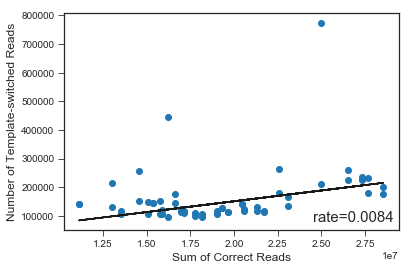

In [238]:
fig, ax = plt.subplots()
plt.scatter(np.asarray(independent_variables),np.asarray(dependent_variables))
# plt.plot(np.asarray(independent_variables),result.slope*np.asarray(independent_variables)+result.intercept,'k--')
plt.plot(np.asarray(independent_variables),r*np.asarray(independent_variables),'k--')
plt.ylabel("Number of Template-switched Reads",size=12)
plt.xlabel("Sum of Correct Reads",size=12)
# plt.text(s='slope='+str(result.slope),x=1.55e14,y=750000,fontdict={'size':15})
# plt.text(s='rate='+str(round(r,4)),x=1.1e7,y=750000,fontdict={'size':15})
plt.text(s='rate='+str(round(rate,4)),x=2.45e7,y=80000,fontdict={'size':15})
ax.xaxis.set_label_position('bottom') 
ax.xaxis.tick_bottom()
# ax.invert_yaxis()
# plt.legend([''])
# plt.savefig('template_switching_rate_nooutliers.pdf',bbox_inches='tight')

In [76]:
result

LinregressResult(slope=6.455196746601199e-10, intercept=107257.3821176212, rvalue=0.2747427401426485, pvalue=0.04043927346469636, stderr=3.074281943828288e-10)

In [79]:
help(scipy.optimize.leastsq)

Help on function leastsq in module scipy.optimize.minpack:

leastsq(func, x0, args=(), Dfun=None, full_output=0, col_deriv=0, ftol=1.49012e-08, xtol=1.49012e-08, gtol=0.0, maxfev=0, epsfcn=None, factor=100, diag=None)
    Minimize the sum of squares of a set of equations.
    
    ::
    
        x = arg min(sum(func(y)**2,axis=0))
                 y
    
    Parameters
    ----------
    func : callable
        should take at least one (possibly length N vector) argument and
        returns M floating point numbers. It must not return NaNs or
        fitting might fail.
    x0 : ndarray
        The starting estimate for the minimization.
    args : tuple, optional
        Any extra arguments to func are placed in this tuple.
    Dfun : callable, optional
        A function or method to compute the Jacobian of func with derivatives
        across the rows. If this is None, the Jacobian will be estimated.
    full_output : bool, optional
        non-zero to return all optional outputs.


In [219]:
forward_primers = {'P104':'CGATGT','P105':'ACAGTG','P111':'TGACCA','P112':'GCCAAT','P122':'ATCACG',
                   'P123':'CAGATC','P124':'GGCTAC','P125':'TAGCTT','P130':'TTAGGC','P131':'ACTTGA',
                   'P132':'GATCAG','P133':'CTTGTA'}
reverse_primers = {'P101':'TATATACGC','P108':'CGCTCTATC','P109':'GAGACGTCT','P110':'ATACTGCGT',
                   'P126':'ACTAGCAGA','P127':'TGAGCTAGC','P128':'CTGCTACTC','P129':'GCGTACGCA'}

In [220]:
def hamming_distance(s1, s2):
    print(s1,s2)
    assert len(s1) == len(s2)
    return sum(ch1 != ch2 for ch1, ch2 in zip(s1, s2))

In [222]:
forward_hamming = np.zeros((len(forward_primers.keys()),len(forward_primers.keys())))
reverse_hamming = np.zeros((8,8))
forward_list = []
reverse_list = []
for key,item in forward_primers.items():
    forward_list.append(item)
for key,item in reverse_primers.items():
    reverse_list.append(item)
    
for i in range(len(forward_list)):
    for j in range(len(forward_list)):
        forward_hamming[i][j] = hamming_distance(forward_list[i],forward_list[j])
        
for i in range(len(reverse_list)):
    for j in range(len(reverse_list)):
        reverse_hamming[i][j] = hamming_distance(reverse_list[i],reverse_list[j])
    

CGATGT CGATGT
CGATGT ACAGTG
CGATGT TGACCA
CGATGT GCCAAT
CGATGT ATCACG
CGATGT CAGATC
CGATGT GGCTAC
CGATGT TAGCTT
CGATGT TTAGGC
CGATGT ACTTGA
CGATGT GATCAG
CGATGT CTTGTA
ACAGTG CGATGT
ACAGTG ACAGTG
ACAGTG TGACCA
ACAGTG GCCAAT
ACAGTG ATCACG
ACAGTG CAGATC
ACAGTG GGCTAC
ACAGTG TAGCTT
ACAGTG TTAGGC
ACAGTG ACTTGA
ACAGTG GATCAG
ACAGTG CTTGTA
TGACCA CGATGT
TGACCA ACAGTG
TGACCA TGACCA
TGACCA GCCAAT
TGACCA ATCACG
TGACCA CAGATC
TGACCA GGCTAC
TGACCA TAGCTT
TGACCA TTAGGC
TGACCA ACTTGA
TGACCA GATCAG
TGACCA CTTGTA
GCCAAT CGATGT
GCCAAT ACAGTG
GCCAAT TGACCA
GCCAAT GCCAAT
GCCAAT ATCACG
GCCAAT CAGATC
GCCAAT GGCTAC
GCCAAT TAGCTT
GCCAAT TTAGGC
GCCAAT ACTTGA
GCCAAT GATCAG
GCCAAT CTTGTA
ATCACG CGATGT
ATCACG ACAGTG
ATCACG TGACCA
ATCACG GCCAAT
ATCACG ATCACG
ATCACG CAGATC
ATCACG GGCTAC
ATCACG TAGCTT
ATCACG TTAGGC
ATCACG ACTTGA
ATCACG GATCAG
ATCACG CTTGTA
CAGATC CGATGT
CAGATC ACAGTG
CAGATC TGACCA
CAGATC GCCAAT
CAGATC ATCACG
CAGATC CAGATC
CAGATC GGCTAC
CAGATC TAGCTT
CAGATC TTAGGC
CAGATC ACTTGA
CAGATC GATCAG
CAGATC

In [223]:
forward_hamming

array([[0., 5., 4., 5., 6., 5., 4., 5., 4., 4., 6., 5.],
       [5., 0., 5., 5., 4., 5., 6., 5., 4., 4., 5., 4.],
       [4., 5., 0., 6., 5., 6., 5., 4., 4., 5., 5., 5.],
       [5., 5., 6., 0., 4., 5., 3., 5., 6., 5., 4., 6.],
       [6., 4., 5., 4., 0., 5., 5., 6., 5., 5., 5., 5.],
       [5., 5., 6., 5., 5., 0., 5., 3., 5., 6., 5., 4.],
       [4., 6., 5., 3., 5., 5., 0., 6., 5., 5., 4., 6.],
       [5., 5., 4., 5., 6., 3., 6., 0., 5., 6., 4., 5.],
       [4., 4., 4., 6., 5., 5., 5., 5., 0., 5., 6., 4.],
       [4., 4., 5., 5., 5., 6., 5., 6., 5., 0., 5., 4.],
       [6., 5., 5., 4., 5., 5., 4., 4., 6., 5., 0., 5.],
       [5., 4., 5., 6., 5., 4., 6., 5., 4., 4., 5., 0.]])

In [218]:
reverse_hamming

array([[0., 8., 7., 6., 6., 6., 5., 9.],
       [8., 0., 8., 9., 8., 4., 6., 8.],
       [7., 8., 0., 7., 8., 8., 8., 6.],
       [6., 9., 7., 0., 7., 7., 5., 9.],
       [6., 8., 8., 7., 0., 7., 9., 6.],
       [6., 4., 8., 7., 7., 0., 8., 9.],
       [5., 6., 8., 5., 9., 8., 0., 8.],
       [9., 8., 6., 9., 6., 9., 8., 0.]])

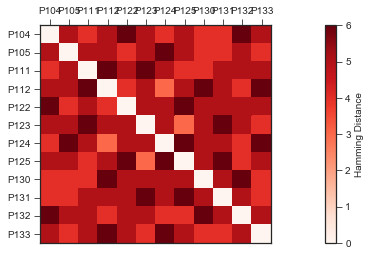

<Figure size 432x288 with 0 Axes>

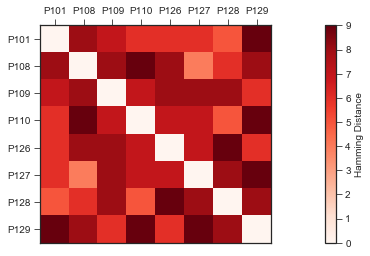

In [230]:
fig, ax1 = plt.subplots()
pcm = plt.pcolormesh(forward_hamming,cmap='Reds')
cbar = fig.colorbar(pcm,pad=0.16)
cbar.set_label('Hamming Distance')
plt.xticks(np.asarray(range(len(forward_primers.keys())))+0.5,forward_primers.keys())
plt.yticks(np.asarray(range(len(forward_primers.keys())))+0.5,forward_primers.keys())
plt.gca().invert_yaxis()

plt.figure()
fig2, ax2 = plt.subplots()
pcm2 = plt.pcolormesh(reverse_hamming,cmap='Reds')
cbar = fig2.colorbar(pcm2,pad=0.16)
cbar.set_label('Hamming Distance')
plt.xticks(np.asarray(range(len(reverse_primers.keys())))+0.5,reverse_primers.keys())
plt.yticks(np.asarray(range(len(reverse_primers.keys())))+0.5,reverse_primers.keys())
plt.gca().invert_yaxis()


# plt.title('Evidence for Index Switching in #1BigBatch Sequencing',y=1.15,fontsize=13)

# plt.plot(np.asarray(range(len(master_list[0])))+0.5,np.asarray(range(len(master_list[0])))+0.5,'ro',linestyle='')
# plt.gca().invert_yaxis()
# ax1.xaxis.tick_top()

# plt.xlabel('Percentage of Reads to Correct Rev. Primer',fontsize=11)
# plt.xticks(np.asarray(range(len(master_list[0])))+0.5,[str(round(max(i)/sum(i)*100,0)).split('.')[0] + '%' for i in np.asarray(master_list).swapaxes(0,1)])
# plt.ylabel('Forward Primers',fontsize=12)
# plt.yticks(np.asarray(range(len(master_list)))+0.5,reads.keys())

# ax2 = ax1.twinx()
# ax2.set_ylim(ax1.get_ylim())
# ax2.set_ylabel('Percentage of Reads to Correct Fwd. Primer',fontsize=11)
# ax2.set_yticks(np.asarray(range(len(master_list[:8])))+0.5)
# ax2.set_yticklabels([str(round(max(i)/sum(i)*100,0)).split('.')[0] + '%' for i in master_list[:8]])

# ax3 = ax1.twiny()
# ax3.set_xlim(ax1.get_xlim())
# ax3.set_xticks(np.asarray(range(len(master_list[0])))+0.5,minor=False)
# ax3.set_xticklabels(reads['P104'].keys())
# ax3.set_xlabel('Reverse Primers',fontsize=12)
# leg = fig.legend(['True Pairs'],loc=(0.72,0.04),handletextpad=0.005,fontsize=11)
# for text in leg.get_texts():
#     text.set_color('r')
# plt.savefig('technical_reps_index_heatmap_percentages.pdf',bbox_inches='tight')

In [3]:
def ravel_x(x,rate,rows,columns,nonzero_indices):
    
    return np.r_[x.ravel()[nonzero_indices],rate]

def unravel_x(flat,rows,columns,nonzero_indices):
    
    x = np.zeros((rows,columns))
    np.put(x,nonzero_indices,flat[:-1])
    
    
    return x, flat[-1]


def function(x_flat,y,rows,columns,nonzero_indices):
    
    x, rate = unravel_x(x_flat,rows,columns,nonzero_indices)
    
    row_sums =  np.tile(np.sum(x,axis=0),(rows,1))
    column_sums = np.tile(np.sum(x,axis=1),(columns,1)).T
    
    exp_y = (1-rate)*x + rate*row_sums + rate*column_sums
    
    leastsq = np.sum((y - exp_y)**2)
    
    return leastsq
    
nonzero_indices = [i for i in range(len(np.asarray(pair_list).ravel())) if np.asarray(pair_list).ravel()[i]]
y = np.asarray(master_list)
rows = len(master_list)
columns = len(master_list[0])
x = y
rate = 0.01
flat_x = ravel_x(x,rate,rows,columns,nonzero_indices)
# print(len(flat_x))
# print(y.shape())
# print(function(flat_x,y,rows,columns,nonzero_indices))
outcome = scipy.optimize.minimize(function,flat_x,args=(y,rows,columns,nonzero_indices))

NameError: name 'pair_list' is not defined

In [96]:
best_x, rate = unravel_x(outcome.x,rows,columns,nonzero_indices)

0.011241197776038906


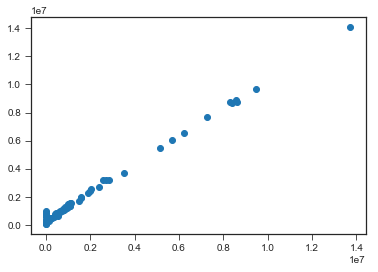

In [101]:
plt.scatter(best_x,y)
print(rate)

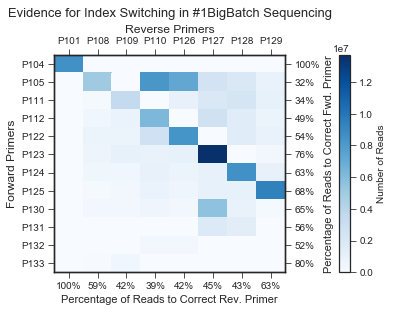

In [108]:
fig, ax1 = plt.subplots()
pcm = plt.pcolormesh(best_x,cmap='Blues')
# pcm = plt.pcolormesh(best_x,cmap='Blues',norm=colors.Log1pNorm(np.min(master_list),np.max(master_list)))
cbar = fig.colorbar(pcm,pad=0.16)
cbar.set_label('Number of Reads')

plt.title('Evidence for Index Switching in #1BigBatch Sequencing',y=1.15,fontsize=13)

# plt.plot(np.asarray(range(len(master_list[0])))+0.5,np.asarray(range(len(master_list[0])))+0.5,'ro',linestyle='')
plt.gca().invert_yaxis()
ax1.xaxis.tick_top()

plt.xlabel('Percentage of Reads to Correct Rev. Primer',fontsize=11)
plt.xticks(np.asarray(range(len(master_list[0])))+0.5,[str(round(max(i)/sum(i)*100,0)).split('.')[0] + '%' for i in np.asarray(best_x).swapaxes(0,1)])
plt.ylabel('Forward Primers',fontsize=12)
plt.yticks(np.asarray(range(len(master_list)))+0.5,reads.keys())

ax2 = ax1.twinx()
ax2.set_ylim(ax1.get_ylim())
ax2.set_ylabel('Percentage of Reads to Correct Fwd. Primer',fontsize=11)
ax2.set_yticks(np.asarray(range(len(master_list)))+0.5)
ax2.set_yticklabels([str(round(max(i)/sum(i)*100,0)).split('.')[0] + '%' for i in best_x])

ax3 = ax1.twiny()
ax3.set_xlim(ax1.get_xlim())
ax3.set_xticks(np.asarray(range(len(master_list[0])))+0.5,minor=False)
ax3.set_xticklabels(reads['P104'].keys())
ax3.set_xlabel('Reverse Primers',fontsize=12)
leg = fig.legend(['True Pairs'],loc=(0.72,0.04),handletextpad=0.005,fontsize=11)
for text in leg.get_texts():
    text.set_color('r')
# plt.savefig('BB2_percentages.pdf',bbox_inches='tight')

In [67]:
np.tril_indices(n=10, k=0, m=5)

(array([0, 1, 1, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 6, 6,
        6, 6, 6, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9]),
 array([0, 0, 1, 0, 1, 2, 0, 1, 2, 3, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1,
        2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4]))

In [73]:
[i for i in range(len(np.asarray(pair_list).ravel())) if np.asarray(pair_list).ravel()[i]]

[0,
 9,
 11,
 12,
 13,
 14,
 15,
 17,
 18,
 20,
 21,
 22,
 23,
 25,
 26,
 27,
 29,
 30,
 31,
 33,
 34,
 35,
 36,
 38,
 39,
 41,
 42,
 43,
 44,
 45,
 47,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 77,
 78,
 83,
 84,
 89,
 90]